<h1 class="text_center">Project description</h1>

The company (operator Megaline) offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.

I carry out a preliminary analysis of the plans based on a relatively small client selection. I'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. My job is to analyze clients' behavior and determine which prepaid plan is more profitable.

In [2]:
from IPython.display import HTML, display, Math, Latex
import tabulate

headers = ["Surf", "Ultimate"]
table = [["Description:", "After exceeding the package limits: 1. 1 minute: 3 cents (Megaline always rounds up to the nearest minute and megabyte. If the call lasted just one second, it will be counted as one minute.) 2. 1 text message: 3 cents 3. 1 GB of data: $10", "After exceeding the package limits: 1. 1 minute: 1 cent 2. 1 text message: 1 cent 3. 1 GB of data: $7"],
         ["Monthly charge:", '20$ dollars', '70$ dollars'],
         ["Minutes:", 500, 3000],
         ["Texts:", 50, 1000],
         ["GB of data:", 15, 30]]
display(HTML("<h3 style='text-align: center'>Description of the plans</h2>"))
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=headers, numalign="center")))


,Surf,Ultimate
Description:,"After exceeding the package limits: 1. 1 minute: 3 cents (Megaline always rounds up to the nearest minute and megabyte. If the call lasted just one second, it will be counted as one minute.) 2. 1 text message: 3 cents 3. 1 GB of data: $10",After exceeding the package limits: 1. 1 minute: 1 cent 2. 1 text message: 1 cent 3. 1 GB of data: $7
Monthly charge:,20$ dollars,70$ dollars
Minutes:,500,3000
Texts:,50,1000
GB of data:,15,30


<h3 class="text-center">Description of the data</h3>

- **user_id** — unique user identifier<br> 
- **first_name** — user's name<br> 
- **last_name** — user's last name<br> 
- **age** — user's age (years)<br> 
- **reg_date** — subscription date (dd, mm, yy)<br> 
- **churn_date** — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)<br> 
- **city** — user's city of residence<br> 
- **plan** — calling plan name<br> 
- **The** calls table (data on calls):<br> 
- **id** — unique call identifier<br> 
- **call_date** — call date<br> 
- **duration** — call duration (in minutes)<br> 
- **user_id** — the identifier of the user making the call<br> 
- **The** messages table (data on texts):<br> 
- **id** — unique text message identifier<br> 
- **message_date** — text message date<br> 
- **user_id** — the identifier of the user sending the text<br> 
- **The** internet table (data on web sessions):<br> 
- **id** — unique session identifier<br> 
- **mb_used** — the volume of data spent during the session (in megabytes)<br> 
- **session_date** — web session date<br> 
- **user_id** — user identifier<br> 
- **The** plans table (data on the plans):<br> 
- **plan_name** — calling plan name<br> 
- **usd_monthly_fee** — monthly charge in US dollars<br> 
- **minutes_included** — monthly minute allowance<br> 
- **messages_included** — monthly text allowance<br> 
- **mb_per_month_included** — data volume allowance (in megabytes)<br> 
- **usd_per_minute** — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)<br> 
- **usd_per_message** — price per text after exceeding the package limits<br> 
- **usd_per_gb** — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)<br> 


In [83]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

import random
import math 

In [49]:
def checkDf(df):
    columns = df.columns
    for column in columns:
        print('-' * 20, column, '-' * 10, 'Number of NaN =', df[column].isna().sum(), end='\n\n')
        print(df[column].value_counts(), end='\n\n')
        
def printTopic(label):
    print('\n\n', '=' * 20, label, '=' * 20, end='\n\n')

In [50]:
megaline_calls = pd.read_csv('./megaline_calls.csv')
megaline_internet = pd.read_csv('./megaline_internet.csv')
megaline_messages = pd.read_csv('./megaline_messages.csv')
megaline_tariffs = pd.read_csv('./megaline_plans.csv')
megaline_users = pd.read_csv('./megaline_users1.csv')


In [51]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'])
megaline_tariffs['gb_per_month_included'] = megaline_tariffs['mb_per_month_included'] / 1024


In [52]:
new_megaline_calls = megaline_calls

new_megaline_calls = new_megaline_calls[new_megaline_calls['duration'] != 0]

new_megaline_calls['month'] = new_megaline_calls['call_date'].dt.month

each_user_count_call = new_megaline_calls.pivot_table(index='user_id', values='month', aggfunc='count')
each_user_count_call.columns = ['call_count']
each_user_count_call['call_count'] = each_user_count_call['call_count'] / 12

each_user_minut = new_megaline_calls.pivot_table(index='user_id', values='duration', aggfunc='sum')
each_user_minut.columns = ['minutes_per_month'] 
each_user_minut['minutes_per_month'] = (each_user_minut['minutes_per_month'] / 12)


/Users/gleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
new_megaline_internet = megaline_internet

new_megaline_internet = new_megaline_internet[new_megaline_internet['mb_used'] != 0]

new_megaline_internet['month'] = new_megaline_internet['session_date'].dt.month
new_megaline_internet['gb_used'] = new_megaline_internet['mb_used'] / 1024

each_user_mb = new_megaline_internet.pivot_table(index='user_id', values='mb_used', aggfunc='sum')
each_user_mb.columns = ['mb_per_month']
each_user_mb['mb_per_month'] = (each_user_mb['mb_per_month'] / 12)


/Users/gleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/gleb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
new_megaline_messages = megaline_messages

new_megaline_messages['month'] = new_megaline_messages['message_date'].dt.month

each_user_count_sms = new_megaline_messages.pivot_table(index='user_id', values='id', aggfunc='count')
each_user_count_sms.columns = ['sms_count_per_month']
each_user_count_sms['sms_count_per_month'] = (each_user_count_sms['sms_count_per_month'] / 12)


Below i want to count mean of user spent mb/minutes/count_sms months. But after understand that it is not accurately, and calculate mean per each month. 

Also I deleted rows with a value of 0 because they were most likely obtained due to connection loss and then such data is corrupted, especially since there are not many of them.

In [55]:
megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [56]:
megaline_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [57]:
megaline_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [58]:
megaline_tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [59]:
megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [60]:
each_user_count_minutes_per_month = new_megaline_calls.pivot_table(index='user_id', columns='month', values='id', aggfunc='count').reset_index()

each_user_minutes_per_month = new_megaline_calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum').reset_index()

each_user_count_sms_per_month = new_megaline_messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count').reset_index()

each_user_gb_per_month = new_megaline_internet.pivot_table(index='user_id', columns='month', values='gb_used', aggfunc='sum').reset_index()

printTopic('EACH USER COUNT MINUTES PER MONTH')
print(each_user_count_minutes_per_month)
printTopic('EACH USER SMS PER MONTH')
print(each_user_count_sms_per_month)
printTopic('EACH USER GB PER MONTH')
print(each_user_gb_per_month)
printTopic('EACH USER MINUTES PER MONTH')
print(each_user_minutes_per_month)




 ==================== EACH USER COUNT MINUTES PER MONTH ====================

month  user_id   1     2     3     4     5     6     7     8     9    10  \
0         1000 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1         1001 NaN   NaN   NaN   NaN   NaN   NaN   NaN  22.0  38.0  47.0   
2         1002 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   8.0   
3         1003 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4         1004 NaN   NaN   NaN   NaN  19.0  33.0  45.0  42.0  32.0  47.0   
..         ...  ..   ...   ...   ...   ...   ...   ...   ...   ...   ...   
476       1495 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  37.0  65.0   
477       1496 NaN   NaN   NaN   NaN   NaN   NaN   NaN  14.0  45.0  35.0   
478       1497 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
479       1498 NaN  28.0  29.0  42.0  29.0  29.0  40.0  37.0  39.0  37.0   
480       1499 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  35.0  41.0   

month  

For each user, found:
- the number of calls made per month;
- the minutes spent per month;
- the number of SMS sent per month;
- the volume of web traffic per month;

In [61]:
def calculateProfit(users_tariff, each_user_per_month, tariffs, tariffs_cost):
    result = pd.DataFrame(columns=['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
    counter = 0
    
    for row in each_user_per_month.iterrows():
        user_id = row[1]['user_id']
        if((users_tariff[users_tariff['user_id'] == user_id]['plan'] == 'surf').reset_index(drop=True)[0]):
            tariff = tariffs[0]
            tariff_cost = tariffs_cost[0]
        else: 
            tariff = tariffs[1]
            tariff_cost = tariffs_cost[1]
            
        new_row = row[1][1:] - tariff
        new_row[new_row < 0] = pd.np.nan
        user_profit_call = (new_row * tariff_cost)
        result_row = pd.concat([pd.Series([user_id], index=['user_id']), user_profit_call]).tolist()
        result.loc[len(result)] = result_row

            
    return result

In [62]:
profit_minutes = calculateProfit(megaline_users, each_user_minutes_per_month, megaline_tariffs['minutes_included'], megaline_tariffs['usd_per_minute']).set_index('user_id')

printTopic('EACH USER PROFIT MINUTES PER MONTH')
print(profit_minutes)
printTopic('TOP OF PROFIT')
print(profit_minutes.sum(axis=1).sort_values( ascending=False).head(20), end='\n\n')




 ==================== EACH USER PROFIT MINUTES PER MONTH ====================

          1   2   3   4   5   6   7   8   9      10  11     12
user_id                                                       
1000.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
1001.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
1002.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
1003.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN  16.23
1004.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
...      ..  ..  ..  ..  ..  ..  ..  ..  ..     ...  ..    ...
1495.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN  2.3409 NaN    NaN
1496.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
1497.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
1498.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN
1499.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN NaN    NaN

[481 rows x 12 columns]


 ==================== TOP OF PROFIT ====================

user_id
1324.0 

In [63]:
profit_sms = calculateProfit(megaline_users, each_user_count_sms_per_month, megaline_tariffs['messages_included'], megaline_tariffs['usd_per_message']).set_index('user_id')

printTopic('EACH USER PROFIT SMS PER MONTH')
print(profit_sms)
printTopic('TOP OF PROFIT')
print(profit_sms.sum(axis=1).sort_values( ascending=False).head(20), end='\n\n')




 ==================== EACH USER PROFIT SMS PER MONTH ====================

          1   2   3   4   5     6     7    8    9    10  11   12
user_id                                                         
1000.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN
1001.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN  0.09 NaN  NaN
1002.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN
1003.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  0.0
1004.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN
...      ..  ..  ..  ..  ..   ...   ...  ...  ...   ...  ..  ...
1491.0  NaN NaN NaN NaN NaN  0.12  0.42  0.0  0.0  0.03 NaN  NaN
1492.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN
1494.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN
1496.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN
1497.0  NaN NaN NaN NaN NaN   NaN   NaN  NaN  NaN   NaN NaN  NaN

[402 rows x 12 columns]


 ==================== TOP OF PROFIT ===============

In [64]:
profit_internet = calculateProfit(megaline_users, each_user_gb_per_month, megaline_tariffs['gb_per_month_included'], megaline_tariffs['usd_per_gb']).set_index('user_id')

printTopic('EACH USER PROFIT INTERNET PER MONTH')
print(profit_internet)
printTopic('TOP OF PROFIT')
print(profit_internet.sum(axis=1).sort_values( ascending=False).head(20), end='\n\n')




 ==================== EACH USER PROFIT INTERNET PER MONTH ====================

          1          2         3          4          5          6          7  \
user_id                                                                        
1000.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1001.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1002.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1003.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1004.0  NaN        NaN       NaN        NaN        NaN  51.883008  89.420117   
...      ..        ...       ...        ...        ...        ...        ...   
1495.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1496.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1497.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1498.0  NaN  43.574609  42.81582  44.1

In [65]:
profit_all_sources = profit_internet.add(profit_sms, fill_value=0).add(profit_minutes, fill_value=0)

printTopic('PROFIT FROM ALL SOURCES TOGETHER')
print(profit_all_sources)




 ==================== PROFIT FROM ALL SOURCES TOGETHER ====================

          1          2         3          4          5          6          7  \
user_id                                                                        
1000.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1001.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1002.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1003.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1004.0  NaN        NaN       NaN        NaN        NaN  51.883008  89.420117   
...      ..        ...       ...        ...        ...        ...        ...   
1495.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1496.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1497.0  NaN        NaN       NaN        NaN        NaN        NaN        NaN   
1498.0  NaN  43.574609  42.81582  44.1294

In [66]:
def takeMonth(date):
    if date != date :
        return pd.Timestamp('2018-12-31')
    return pd.to_datetime(date)

megaline_users['churn_date'] = megaline_users['churn_date'].apply(takeMonth)

month_user_use = []
for i in range(len(megaline_users)):
    first_month = megaline_users['reg_date'].dt.month[i]
    second_date = megaline_users['churn_date'].dt.month[i]
    month_user_use.append(list(range(first_month, second_date + 1)))


In [68]:
dataframe = pd.DataFrame(data=megaline_users['user_id'], columns=['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

each_user_monthly_charged_per_month = pd.DataFrame(columns=['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
counter = 0

for row in dataframe.iterrows():
    user_id = row[1]['user_id']
    if((megaline_users[megaline_users['user_id'] == user_id]['plan'] == 'surf').reset_index(drop=True)[0]):
        tariff = 20
    else: 
        tariff = 70
    months = month_user_use[counter]
    counter += 1
    for month in months:
        row[1][month] = tariff
    each_user_monthly_charged_per_month.loc[len(each_user_monthly_charged_per_month)] = row[1]


In [69]:
profit_all_sources_plus_charged = profit_all_sources.add(each_user_monthly_charged_per_month.set_index('user_id'), fill_value=0)

printTopic('PROFIT FROM ALL SOURCES TOGETHER + CHARGED TARIFF')
print(profit_all_sources_plus_charged)




 ==================== PROFIT FROM ALL SOURCES TOGETHER + CHARGED TARIFF ====================

           1        2        3        4        5       6        7        8  \
user_id                                                                      
1000.0   NaN      NaN      NaN      NaN      NaN     NaN      NaN      NaN   
1001.0   NaN      NaN      NaN      NaN      NaN     NaN      NaN       20   
1002.0   NaN      NaN      NaN      NaN      NaN     NaN      NaN      NaN   
1003.0    20       20       20       20       20      20       20       20   
1004.0   NaN      NaN      NaN      NaN       20  71.883   109.42  143.259   
...      ...      ...      ...      ...      ...     ...      ...      ...   
1495.0   NaN      NaN      NaN      NaN      NaN     NaN      NaN      NaN   
1496.0   NaN       20       20       20       20      20       20       20   
1497.0   NaN      NaN      NaN      NaN      NaN     NaN      NaN      NaN   
1498.0   NaN  63.5746  62.8158  64.1295  89.35

Found  monthly profit from each of the users (subtract free package limit from the total number of calls, SMS and web traffic; multiply the result by the calling plan value; add monthly charge depending on the calling plan).

In [74]:
def shareProfits(profit_table):
    array_surf = []
    array_ultimate = []
    
    for row in profit_table.iterrows():
        user_id = row[1]['user_id']
        if((megaline_users[megaline_users['user_id'] == user_id]['plan'] == 'surf').reset_index(drop=True)[0]):
            array_surf.append(list(row[1]))
        else: 
            array_ultimate.append(list(row[1]))
            
    return [pd.DataFrame(array_surf), pd.DataFrame(array_ultimate)]


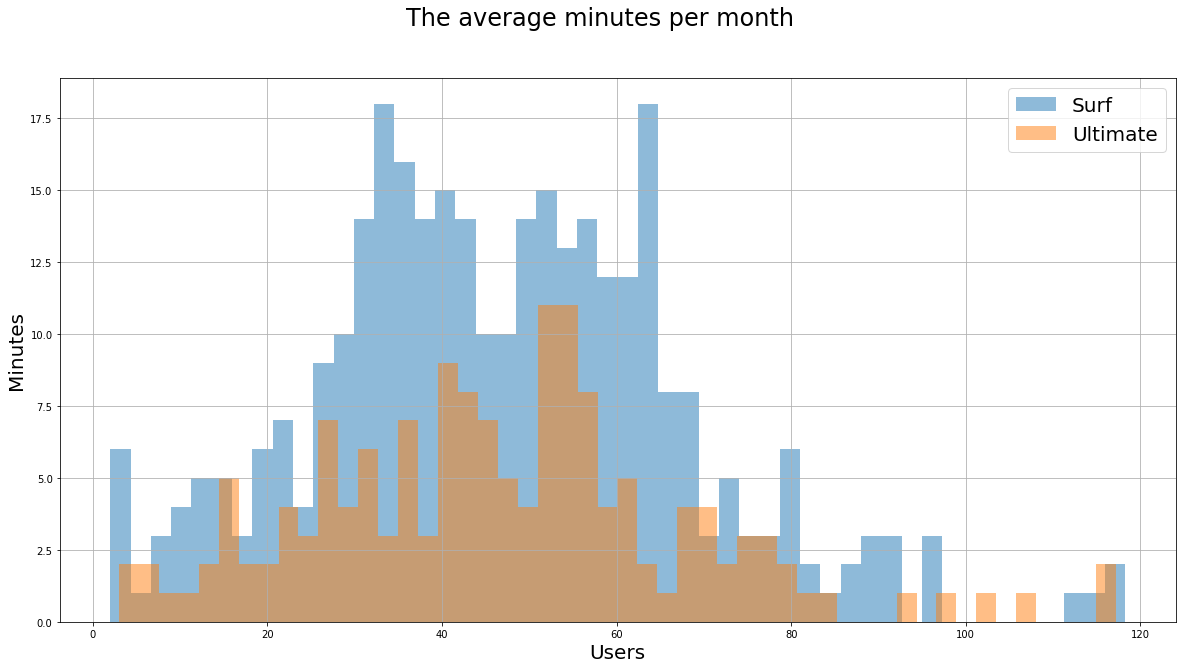

In [103]:
each_user_count_minutes_per_month_surf = shareProfits(each_user_count_minutes_per_month)[0]
each_user_count_minutes_per_month_surf.columns = ['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
each_user_count_minutes_per_month_surf = each_user_count_minutes_per_month_surf.set_index('user_id')

each_user_count_minutes_per_month_ultimate = shareProfits(each_user_count_minutes_per_month)[1]
each_user_count_minutes_per_month_ultimate.columns = ['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
each_user_count_minutes_per_month_ultimate = each_user_count_minutes_per_month_ultimate.set_index('user_id')

each_user_count_minutes_surf_mean = each_user_count_minutes_per_month_surf.mean(axis=1)
each_user_count_minutes_ultimate_mean = each_user_count_minutes_per_month_ultimate.mean(axis=1)

fig = plt.figure(figsize=(20,10))
fig.suptitle("The average minutes per month", fontsize=24)
plt.xlabel("Users", fontsize=20)
plt.ylabel("Minutes", fontsize=20)

each_user_count_minutes_surf_mean.hist(bins=50, alpha=0.5)
each_user_count_minutes_ultimate_mean.hist(bins=50, alpha=0.5)

plt.legend(['Surf', 'Ultimate'], fontsize=20)


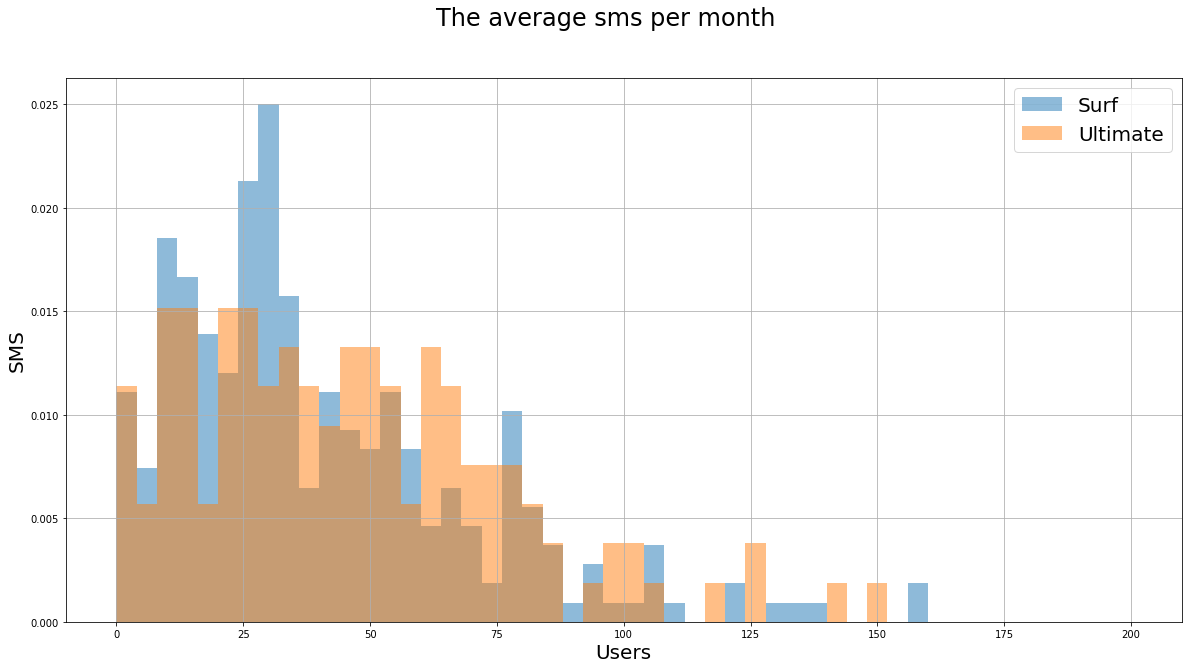

In [109]:
each_user_count_sms_per_month_surf = shareProfits(each_user_count_sms_per_month)[0]
each_user_count_sms_per_month_surf.columns = ['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
each_user_count_sms_per_month_surf = each_user_count_sms_per_month_surf.set_index('user_id')

each_user_count_sms_per_month_ultimate = shareProfits(each_user_count_sms_per_month)[1]
each_user_count_sms_per_month_ultimate.columns = ['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
each_user_count_sms_per_month_ultimate = each_user_count_sms_per_month_ultimate.set_index('user_id')

each_user_count_sms_surf_mean = each_user_count_sms_per_month_surf.mean(axis=1)
each_user_count_sms_ultimate_mean = each_user_count_sms_per_month_ultimate.mean(axis=1)

fig = plt.figure(figsize=(20,10))
fig.suptitle("The average sms per month", fontsize=24)
plt.xlabel("Users", fontsize=20)
plt.ylabel("SMS", fontsize=20)

each_user_count_sms_surf_mean.hist(bins=50, alpha=0.5, density=True, range=(0,200))
each_user_count_sms_ultimate_mean.hist(bins=50, alpha=0.5, density=True, range=(0,200))

plt.legend(['Surf', 'Ultimate'], fontsize=20)


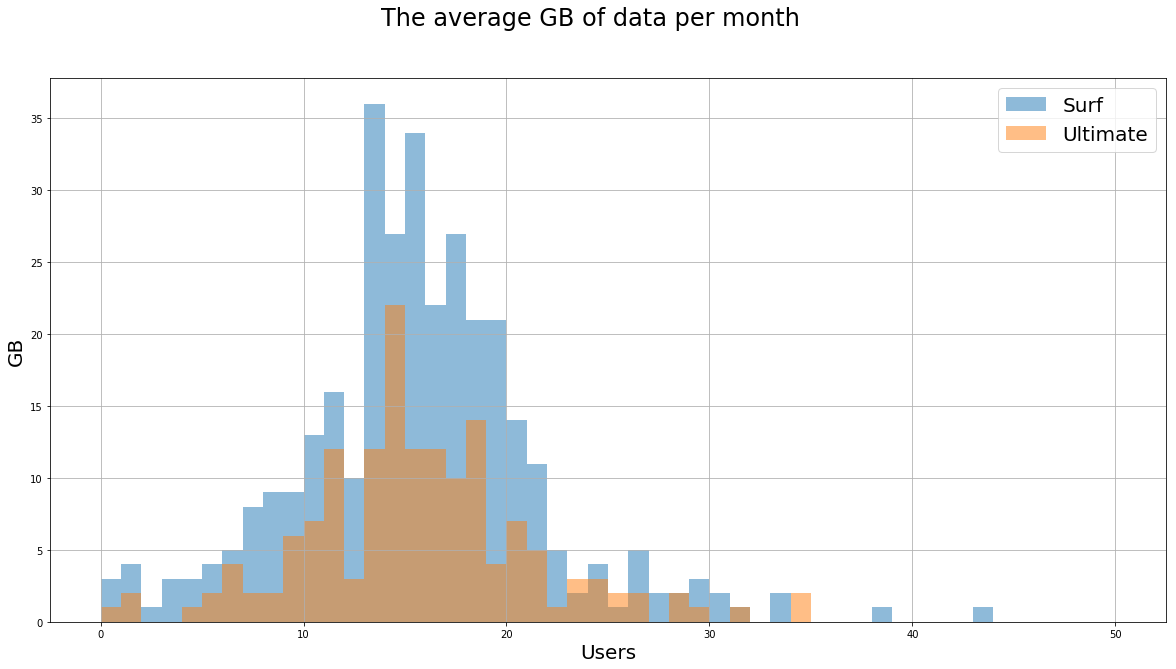

In [110]:
each_user_count_gb_per_month_surf = shareProfits(each_user_gb_per_month)[0]
each_user_count_gb_per_month_surf.columns = ['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
each_user_count_gb_per_month_surf = each_user_count_gb_per_month_surf.set_index('user_id')

each_user_count_gb_per_month_ultimate = shareProfits(each_user_gb_per_month)[1]
each_user_count_gb_per_month_ultimate.columns = ['user_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
each_user_count_gb_per_month_ultimate = each_user_count_gb_per_month_ultimate.set_index('user_id')

each_user_count_gb_surf_mean = each_user_count_gb_per_month_surf.mean(axis=1)
each_user_count_gb_ultimate_mean = each_user_count_gb_per_month_ultimate.mean(axis=1)

each_user_count_gb_surf_var = each_user_count_gb_per_month_surf.var(axis=1)
each_user_count_gb_ultimate_var = each_user_count_gb_per_month_ultimate.var(axis=1)

each_user_count_gb_surf_std = each_user_count_gb_per_month_surf.std(axis=1)
each_user_count_gb_ultimate_std = each_user_count_gb_per_month_ultimate.std(axis=1)

fig = plt.figure(figsize=(20,10))
fig.suptitle("The average GB of data per month", fontsize=24)
plt.xlabel("Users", fontsize=20)
plt.ylabel("GB", fontsize=20)

each_user_count_gb_surf_mean.hist(bins=50, alpha=0.5, range=(0, 50))
each_user_count_gb_ultimate_mean.hist(bins=50, alpha=0.5, range=(0, 50))

plt.legend(['Surf', 'Ultimate'], fontsize=20)


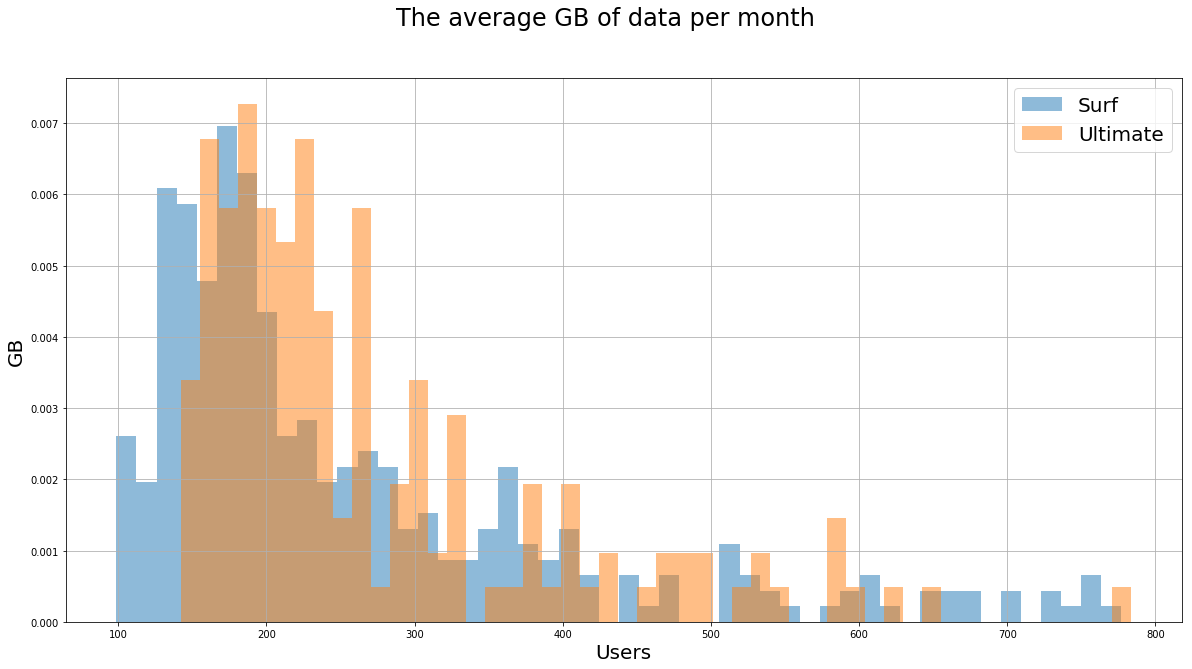

In [121]:
profit_all_sources_plus_charged_surf = shareProfits(profit_all_sources_plus_charged.reset_index())[0]
profit_all_sources_plus_charged_ultimate = shareProfits(profit_all_sources_plus_charged.reset_index())[1]

profit_all_sources_plus_charged_surf_mean = profit_all_sources_plus_charged_surf.mean(axis=1)
profit_all_sources_plus_charged_ultimate_mean = profit_all_sources_plus_charged_ultimate.mean(axis=1)

fig = plt.figure(figsize=(20,10))
fig.suptitle("The average GB of data per month", fontsize=24)
plt.xlabel("Users", fontsize=20)
plt.ylabel("GB", fontsize=20)

profit_all_sources_plus_charged_surf_mean.hist(density=True, bins=50, alpha=0.5)
profit_all_sources_plus_charged_ultimate_mean.hist(density=True, alpha=0.5, bins=50)

plt.legend(['Surf', 'Ultimate'], fontsize=20)

In [122]:
megaline_tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In principle, I can draw a simple conclusion from histograms. Our users, regardless of the tariff, spend the same amount of traffic (SMS, Internet, minutes), which indicates that they are overpaying, either for the tariff or for additional minutes.

This is good for our company, but to be honest, I would conduct a promotional campaign to inform customers about tariff plans.

<h2 class="text_center">Testing hypothesis</h2>

In [123]:
def shareProfitsCity(profit_table):
    array_NY_NJ = []
    array_other = []
    
    for row in profit_table.iterrows():
        user_id = row[1]['user_id']
        if(('NY-NJ' in megaline_users[megaline_users['user_id'] == user_id]['city'].reset_index()['city'][0])):
            array_NY_NJ.append(list(row[1]))
        else: 
            array_other.append(list(row[1]))
            
    return [pd.DataFrame(array_NY_NJ), pd.DataFrame(array_other)]

In [135]:
sample_surf = random.sample(list(profit_all_sources_plus_charged_surf_mean), 30)
sample_ultimate = random.sample(list(profit_all_sources_plus_charged_ultimate_mean), 30)

alpha = 0.05

results = st.ttest_ind(sample_surf, sample_ultimate)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")


p-value:  0.1654317519236492
We can't reject the null hypothesis


In [134]:
profit_NY_NJ = shareProfitsCity(profit_all_sources_plus_charged.reset_index())[0].set_index(0)
profit_other = shareProfitsCity(profit_all_sources_plus_charged.reset_index())[1]

profit_NY_NJ_mean = profit_NY_NJ.mean(axis=1)
profit_other_mean = profit_other.mean(axis=1)

sample_NY_NJ = random.sample(list(profit_NY_NJ_mean), 30)
sample_other = random.sample(list(profit_other_mean), 30)


alpha = 0.05

results = st.ttest_ind(profit_NY_NJ_mean, profit_other_mean)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")
        

p-value:  1.8199391089097192e-36
We reject the null hypothesis


<div style="font-family: Helvetica">
    <h3 style='text-align: center'>About hypotheses</h3>
    <p>H<sub>0</sub> is the same for two hypotheses. Sample one is equal to sample two. And in both cases, the p-value is very large, which tells us that we can't reject our zero hypothesis and the average value of our samples and our General populations is equal.</p>
    <h3 style='text-align: center'>Conclusion</h3>
    <p>Although there is a large difference in the price of the fares, there is no difference in revenue between the users from the two fares.</p>
</div>

